In [1]:
import h5py
import matplotlib.pyplot as plt
import os
import re
import numpy as np

## Get background measurment of background scatters with varied probe power.

For on-diagonal measurement filter 730-39, we took data for probe beam 99uW, 970uW, 10.5mW, 49mW, and 113mW. 

## Check 300 data files in each shot (folder)

In [2]:
folder_paths = [r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0012', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0013', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0014', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0015', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0016', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0017', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0018', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0019', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0020', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0021', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0022', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0023', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0024', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0025', 
                r'C:\Experiments\lyman29\BaF_Fluorescence\2025\02\27\0026']

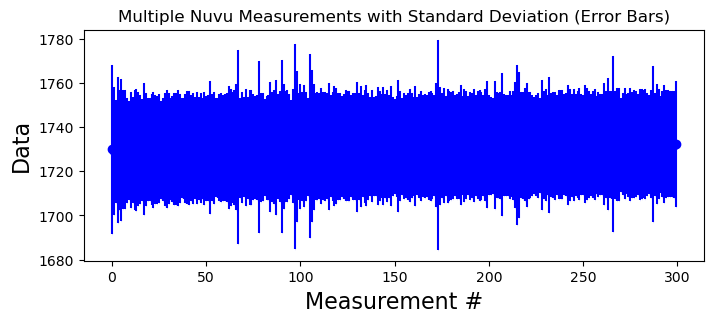

In [32]:
mean_array_nuvu=[]
std_array_nuvu=[]
folder_path=folder_paths[1]
count=0
for filename in os.listdir(folder_path):
    count+=1
    # print(filename)
    file_path = os.path.join(folder_path, filename)
    # if file_path.endswith('.h5'):
    with h5py.File(file_path, 'r') as file:
        if 'images/camera/fluorescence/frame' in file:
            image_data_nuvu = file['images/camera/fluorescence/frame'][:]
            mean_array_nuvu.append(np.mean(image_data_nuvu))
            std_array_nuvu.append(np.std(image_data_nuvu))
            if np.std(image_data_nuvu) > 200:
                print(file_path)
    if count>300:
        break
        
# Plot the data with error bars representing the standard deviation
plt.figure(figsize=(8, 3))
plt.errorbar(np.arange(len(mean_array_nuvu)), mean_array_nuvu, yerr=std_array_nuvu, fmt='o', label='Data with std', color='blue', capsize=0.05)
plt.title('Multiple Nuvu Measurements with Standard Deviation (Error Bars)')
plt.xlabel('Measurement #', fontsize=16)
plt.ylabel('Data', fontsize=16)
# Show the plot
plt.show()



## Plot mean values. (Here the std is std of the mean value)

means are
[1578.3046944323569, 1578.047146660941, 1578.1930384630646, 1578.646924513123, 1580.1596653859085]
stds are
[0.7738261165777833, 0.738282451481225, 0.7282056682679222, 1.0464085846272504, 3.1763810785421804]


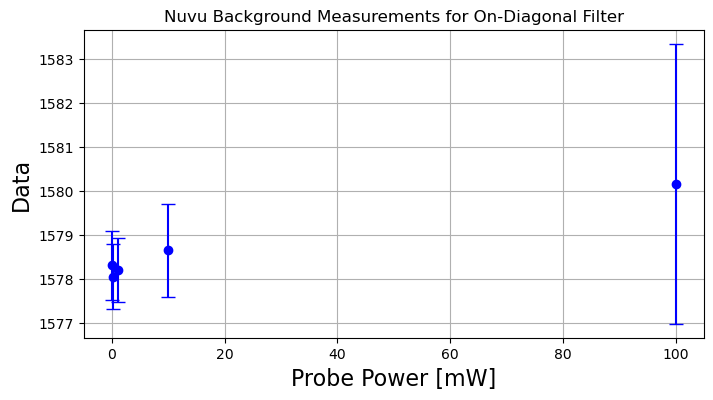

In [5]:
mean_array_nuvu=[]
means = []
stds = []
for folder_path in folder_paths:
    count=0
    for filename in os.listdir(folder_path):
        # print(filename)
        file_path = os.path.join(folder_path, filename)
        if file_path.endswith('.h5'):
            with h5py.File(file_path, 'r') as file:
                if 'images/camera/fluorescence/frame' in file:
                    image_data_nuvu = file['images/camera/fluorescence/frame'][:]
                    mean_array_nuvu.append(np.mean(image_data_nuvu))
                    count+=1
        if count>300:
            break
    means.append(np.mean(mean_array_nuvu))
    stds.append(np.std(mean_array_nuvu))
        
print("means are")
print(means)
print("stds are")
print(stds)
# Plot the data with error bars representing the standard deviation
plt.figure(figsize=(8, 4))
plt.errorbar(np.array([0,0.1, 1, 10, 100]), means, yerr=stds, fmt='o', label='Data with std', color='blue', capsize=5)
# plt.xscale('log', base=10)
plt.title('Nuvu Background Measurements for On-Diagonal Filter')
plt.xlabel('Probe Power [mW]', fontsize=16)
plt.ylabel('Data', fontsize=16)
# Show the plot
plt.grid()
plt.show()
